# Escenario 1

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Cargando tweets

In [5]:
tweets_df = pd.read_csv('./data/tweets_labeled.csv', sep = ',')

In [6]:
tweets_df.shape

(648, 3)

In [7]:
tweets_df.head()

,full_text,sentiment,emotion
0,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\nUribe Velez Alvarito no los deja dormir\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir 😂 https://t.co/k56Dv7id1J,negative,joy
4,"#OtraPregunta \n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\nEsto no pinta nada bien... y si además gana Lula en Brasil...\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.413580
NaN         0.371914
neutral     0.171296
positive    0.043210
Name: sentiment, dtype: float64

In [9]:
tweets_df['emotion'].value_counts(dropna = False, normalize = True)

NaN        0.433642
anger      0.277778
joy        0.137346
fear       0.104938
sadness    0.046296
Name: emotion, dtype: float64

### Cargando textos

In [10]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [11]:
tweets_labeled_df.shape

(407, 3)

In [12]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [13]:
tweets_unlabeled_df.shape

(241, 3)

### Entrenando datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [15]:
X_train.shape

(325,)

In [16]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.658462
neutral     0.273846
positive    0.067692
Name: sentiment, dtype: float64

In [17]:
X_test.shape

(82,)

In [18]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.658537
neutral     0.268293
positive    0.073171
Name: sentiment, dtype: float64

### Vectorizando texto

In [19]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [21]:
X_bow = bow.fit_transform(X_train)

In [22]:
X_tfidf = tfidf.fit_transform(X_train)

### BOW

In [23]:
model = RandomForestClassifier()

In [24]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [25]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

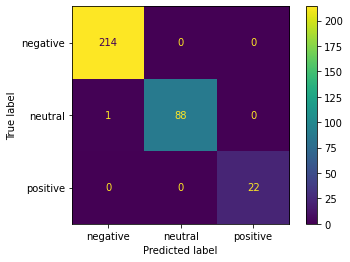

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

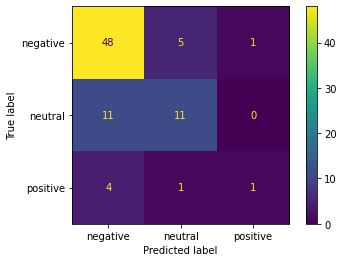

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [28]:
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.76190476 0.64705882 0.5       ]
Recall: [0.88888889 0.5        0.16666667]
F1: [0.82051282 0.56410256 0.25      ]


### TF-IDF

# Con RandomForestClassifier

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [31]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

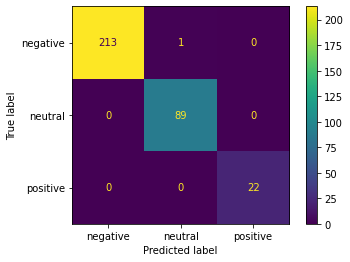

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

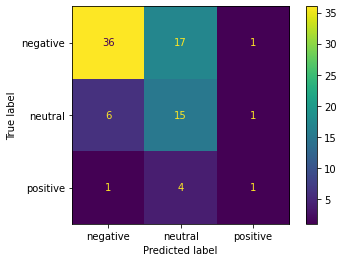

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [34]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.8372093  0.41666667 0.33333333]
Recall: [0.66666667 0.68181818 0.16666667]
F1: [0.74226804 0.51724138 0.22222222]


In [35]:
model = RandomForestClassifier(200)

In [36]:
model.fit(X_tfidf, y_train)

RandomForestClassifier(n_estimators=200)

In [37]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

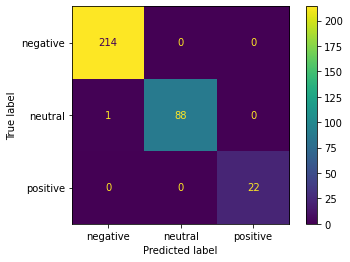

In [38]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

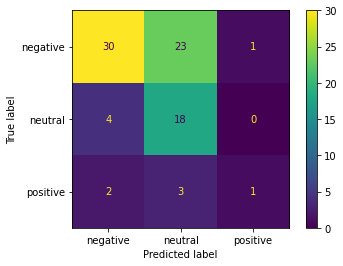

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [40]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.83333333 0.40909091 0.5       ]
Recall: [0.55555556 0.81818182 0.16666667]
F1: [0.66666667 0.54545455 0.25      ]


In [41]:
model = RandomForestClassifier(300)

In [42]:
model.fit(X_tfidf, y_train)

RandomForestClassifier(n_estimators=300)

In [43]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

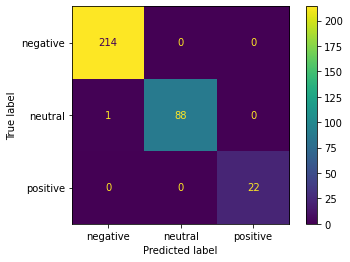

In [44]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

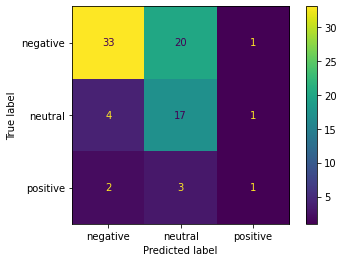

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [46]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.84615385 0.425      0.33333333]
Recall: [0.61111111 0.77272727 0.16666667]
F1: [0.70967742 0.5483871  0.22222222]


# Con DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier()

In [48]:
model.fit(X_tfidf, y_train)

DecisionTreeClassifier()

In [49]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

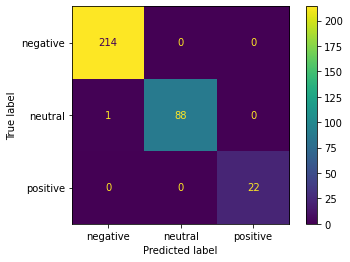

In [50]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

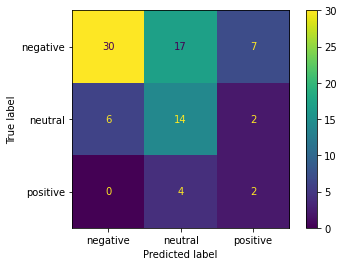

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [52]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.83333333 0.4        0.18181818]
Recall: [0.55555556 0.63636364 0.33333333]
F1: [0.66666667 0.49122807 0.23529412]


# Con SVC

In [53]:
model = SVC()

In [54]:
model.fit(X_tfidf, y_train)

SVC()

In [55]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

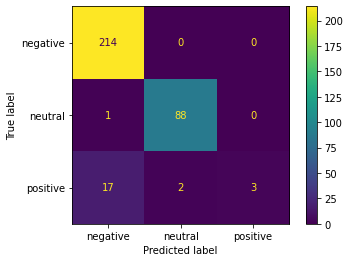

In [56]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

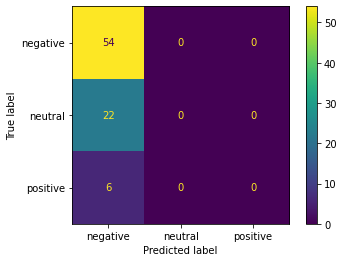

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [58]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.65853659 0.         0.        ]
Recall: [1. 0. 0.]
F1: [0.79411765 0.         0.        ]


C:\Users\Oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Analizando errores

In [59]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [60]:
error_df.shape

(82, 3)

In [61]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(len(error_df))

,full_text,actual,predicted
5,"@ernestomaciast @FicoGutierrez @Rodrigo_LaraS Mi querido senador bachiller, recuérdele a Colombia como votó el Meta en las pasadas elecciones legislativas, ¿cuál fue el desempeño del @UCDemocratico?",neutral,negative
9,En Colombia hace falta un presidente como @nayibbukele que no le teme a nada y va de frente contra las fuerzas oscuras aliadas con políticos que lo único que buscas es inestabilidad en el país previo a elecciones.,positive,negative
17,Gastón Garriga: cómo multiplicar algunas ideas de CFK/Colombia avanza hacia elecciones con Petro amenazado/Interacción con oyentes.,neutral,negative
19,"Además, los gráficos y mapas electorales demuestran la importancia electoral que tiene el centro del país, ante la densidad poblacional y la tradición de salir a votar. https://t.co/tVxPTMLkC2",positive,negative
21,"@CARLOSFMEJIA @infopresidencia @PGN_COL @FiscaliaCol @CNE_COLOMBIA Si la Dra Cabello no se pronuncia y no aparta al Registrador y se roban las elecciones como las del congreso,, va tener culpabilidad porque hay pruebas suficientes,, y la corte que lo eligió también es cómplice si no se pronuncian y lo apartan del cargo, eviten algo peor,🇨🇴🇨🇴🇨🇴",neutral,negative
23,Que mierda que los favoritos a ganar las elecciones tengan todos escándalos de corrupcion XDD ay mi Colombia,negative,neutral
24,🚨ALERTA COLOMBIA🚨Si de verdad quieres hacer parte de la historia y participar activamente en estas elecciones. VINCÚLATE Como TESTIGO ELECTORAL Contribuye a que los COMUNISTAS En Colombia y el mundo nos no vuelvan a cometer fraude electoral.Inscríbete vigílalos y no nos dejemos,neutral,negative
26,"Lo más visto del día: @LaNocheNTN24: '¿Por qué cree usted que debe ser suspendido Alexander Vega, Registrador Nacional del Estado Civil a 23 días de las elecciones presidenciales en Colombia? Responde el abogado constit… https://t.co/GYNN43Mzj2, see more https://t.co/V2dteOMxQQ",neutral,negative
27,"https://t.co/FxFKHi951T. @IvanDuque no respeta la constitución ni la ley, esto favorece mas campaña de @petrogustavo.",neutral,negative
31,¡Está Joya está disponible en Netflix! \n\n*Ojalá Colombia la vea antes de las elecciones. #LaDictaduraPerfecta \n\nLa televisión ya puso un presidente... ¿Lo volverá hacer? #ColombiaDecide https://t.co/jrnNjKSeJR,positive,negative
